In [1]:
### 2021 Data Analysis ###

In [2]:
import pandas as pd
df = pd.read_csv('preprocessed_data.csv')
df.head(3)

,listing_id,id,date,reviewer_id,comments,SentenceLength,Year,detect,comments_token,comments_string
0,13913,451955791,2019-05-12,58728173,alinas place is cosy convenient and full of ec...,268,2019,en,"['alinas', 'place', 'cosy', 'convenient', 'ful...",alinas place cosy convenient full eclectic art...
1,13913,467269212,2019-06-10,2291517,alina was very quick to respond thoughtful and...,91,2019,en,"['alina', 'quick', 'respond', 'thoughtful', 'a...",alina quick respond thoughtful accommodating d...
2,13913,538005731,2019-09-29,7253695,alina is an amazing host who welcomed me warml...,152,2019,en,"['alina', 'amazing', 'host', 'welcomed', 'warm...",alina amazing host welcomed warmly always talk...


In [3]:
data_2021 = df[df["Year"]==2021]
data_2021.to_csv('data_2021.csv', index=False)

In [4]:
df_2021= pd.read_csv('data_2021.csv')
df_2021.head(3)

,listing_id,id,date,reviewer_id,comments,SentenceLength,Year,detect,comments_token,comments_string
0,13913,500561141545521489,2021-11-21,366903575,exactly what i needed! hostels do not do it fo...,249,2021,en,"['exactly', 'needed', 'hostels', 'hotels', 'bo...",exactly needed hostels hotels bore glad chose ...
1,17402,394726713362814033,2021-06-28,397231669,great place great location clean and modern pe...,79,2021,en,"['great', 'place', 'great', 'location', 'clean...",great place great location clean modern perfec...
2,17402,515007156068464320,2021-12-11,54823672,great flat in good location very comfortable,46,2021,en,"['great', 'flat', 'good', 'location', 'comfort...",great flat good location comfortable


In [5]:
len(df_2021)

124347

In [6]:


## Analysis 2021 ##




In [7]:
# Create list of all words
all_words_21 = ' '.join([str(word) for word in df_2021['comments_string']])


In [8]:
# Tokenise all words 
import nltk
tokenized_words_21 = nltk.tokenize.word_tokenize(all_words_21)

In [9]:
# Frequency dstribution for all words 2021
import nltk
from nltk.probability import FreqDist
fdist_21 = FreqDist(tokenized_words_21)

In [10]:
df_2021.head(3)

,listing_id,id,date,reviewer_id,comments,SentenceLength,Year,detect,comments_token,comments_string
0,13913,500561141545521489,2021-11-21,366903575,exactly what i needed! hostels do not do it fo...,249,2021,en,"['exactly', 'needed', 'hostels', 'hotels', 'bo...",exactly needed hostels hotels bore glad chose ...
1,17402,394726713362814033,2021-06-28,397231669,great place great location clean and modern pe...,79,2021,en,"['great', 'place', 'great', 'location', 'clean...",great place great location clean modern perfec...
2,17402,515007156068464320,2021-12-11,54823672,great flat in good location very comfortable,46,2021,en,"['great', 'flat', 'good', 'location', 'comfort...",great flat good location comfortable


In [11]:
# Lemmanisation
nltk.download('wordnet')
nltk.download('omw-1.4')
 
from nltk.stem import WordNetLemmatizer
 
wordnet_lem = WordNetLemmatizer()

df_2021['comments_string'] = df_2021['comments_string'].astype(str)
df_2021['comments_string_lem'] = df_2021['comments_string'].apply(wordnet_lem.lemmatize)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lucywalker/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/lucywalker/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [12]:
df_2021.head(3)

,listing_id,id,date,reviewer_id,comments,SentenceLength,Year,detect,comments_token,comments_string,comments_string_lem
0,13913,500561141545521489,2021-11-21,366903575,exactly what i needed! hostels do not do it fo...,249,2021,en,"['exactly', 'needed', 'hostels', 'hotels', 'bo...",exactly needed hostels hotels bore glad chose ...,exactly needed hostels hotels bore glad chose ...
1,17402,394726713362814033,2021-06-28,397231669,great place great location clean and modern pe...,79,2021,en,"['great', 'place', 'great', 'location', 'clean...",great place great location clean modern perfec...,great place great location clean modern perfec...
2,17402,515007156068464320,2021-12-11,54823672,great flat in good location very comfortable,46,2021,en,"['great', 'flat', 'good', 'location', 'comfort...",great flat good location comfortable,great flat good location comfortable


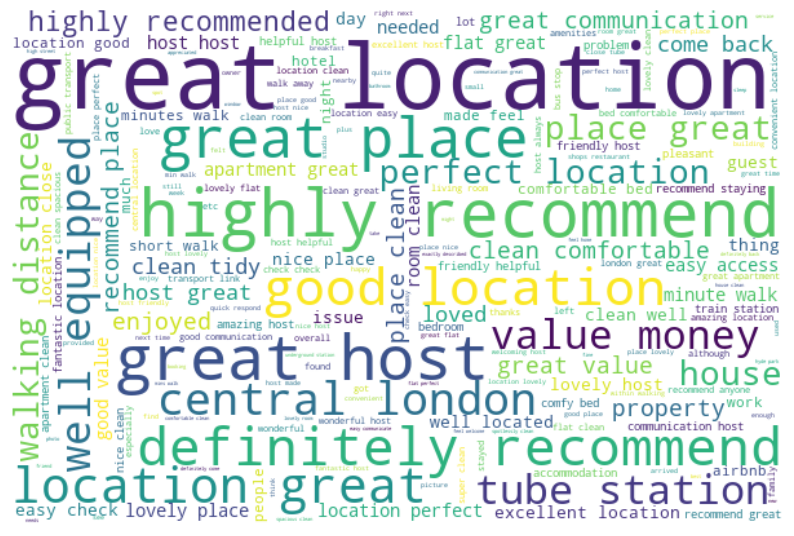

In [13]:
# Word Cloud 2021

all_words_lem_21 = ' '.join([word for word in df_2021['comments_string_lem']])

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2,
                     background_color='white',
                     max_font_size=100).generate(all_words_lem_21)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [14]:
## Add polarity scores to df_2021 - sentiment analysis 

from textblob import TextBlob

df_2021['polarity'] = df_2021['comments'].apply(lambda x: TextBlob(x).polarity)
df_2021.head(3)

,listing_id,id,date,reviewer_id,comments,SentenceLength,Year,detect,comments_token,comments_string,comments_string_lem,polarity
0,13913,500561141545521489,2021-11-21,366903575,exactly what i needed! hostels do not do it fo...,249,2021,en,"['exactly', 'needed', 'hostels', 'hotels', 'bo...",exactly needed hostels hotels bore glad chose ...,exactly needed hostels hotels bore glad chose ...,0.379167
1,17402,394726713362814033,2021-06-28,397231669,great place great location clean and modern pe...,79,2021,en,"['great', 'place', 'great', 'location', 'clean...",great place great location clean modern perfec...,great place great location clean modern perfec...,0.394444
2,17402,515007156068464320,2021-12-11,54823672,great flat in good location very comfortable,46,2021,en,"['great', 'flat', 'good', 'location', 'comfort...",great flat good location comfortable,great flat good location comfortable,0.498750


In [15]:
df_2021["polarity"].mean()

0.41704302791456177

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lucywalker/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


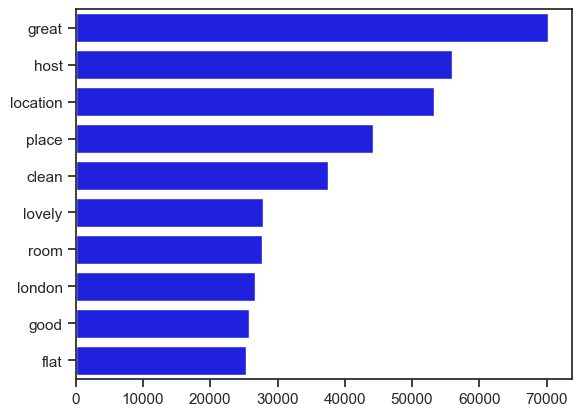

In [16]:
# Frequency Distributions

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem_21)
fd_21 = FreqDist(words)

# Obtain top 10 words
top_10_21 = fd_21.most_common(10)

# Create pandas series to make plotting easier
fdist_21 = pd.Series(dict(top_10_21))

import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist_21.index, x=fdist_21.values, color='blue');

In [17]:
print(top_10_21)

[('great', 70250), ('host', 55897), ('location', 53256), ('place', 44204), ('clean', 37504), ('lovely', 27765), ('room', 27624), ('london', 26577), ('good', 25681), ('flat', 25242)]


In [18]:
#create df for frequency
df_21_freq = pd.DataFrame({'col':top_10_21})
print (df_21_freq)

                 col
0     (great, 70250)
1      (host, 55897)
2  (location, 53256)
3     (place, 44204)
4     (clean, 37504)
5    (lovely, 27765)
6      (room, 27624)
7    (london, 26577)
8      (good, 25681)
9      (flat, 25242)


In [19]:
df_2021[df_2021['polarity']>0].count()

listing_id             121195
id                     121195
date                   121195
reviewer_id            121195
comments               121195
SentenceLength         121195
Year                   121195
detect                 121195
comments_token         121195
comments_string        121195
comments_string_lem    121195
polarity               121195
dtype: int64

In [20]:
df_2021[df_2021['polarity']<0].count()

listing_id             2325
id                     2325
date                   2325
reviewer_id            2325
comments               2325
SentenceLength         2325
Year                   2325
detect                 2325
comments_token         2325
comments_string        2325
comments_string_lem    2325
polarity               2325
dtype: int64

In [21]:
df_2021[df_2021['polarity']==0].count()

listing_id             827
id                     827
date                   827
reviewer_id            827
comments               827
SentenceLength         827
Year                   827
detect                 827
comments_token         827
comments_string        827
comments_string_lem    827
polarity               827
dtype: int64

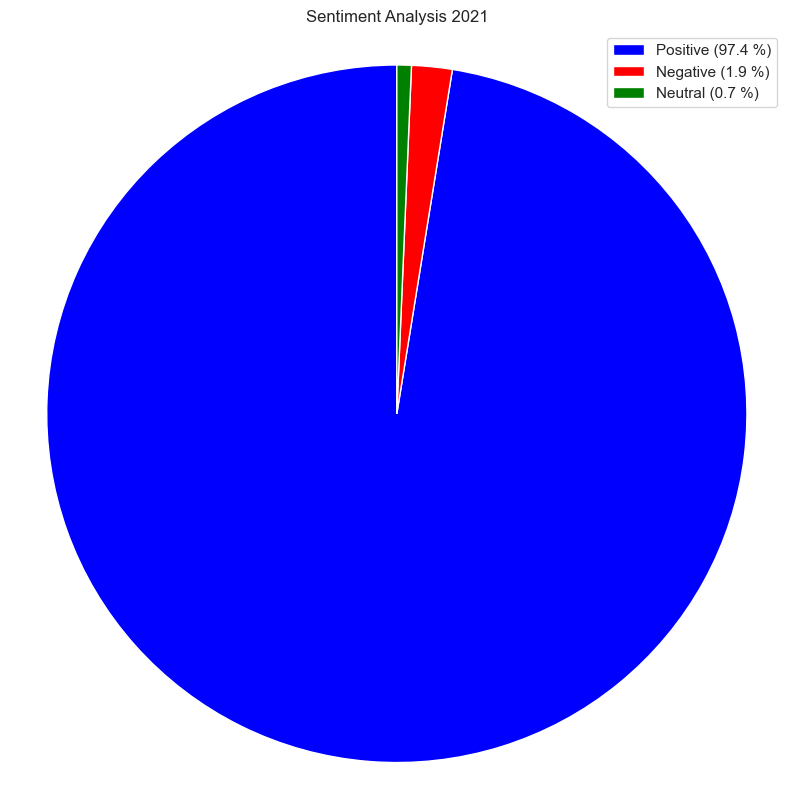

In [22]:
import matplotlib.pyplot as plt
 
data = [121195, 2327, 830]
label = ['Positive', 'Negative', 'Neutral']

labels = [r'Positive (97.4 %)', r'Negative (1.9 %)', r'Neutral (0.7 %)']
colours = ['blue', 'red', 'green']

plt.figure(figsize=(10,10))
plt.pie(data,labels=None, colors = colours, startangle=90)
plt.title('Sentiment Analysis 2021')
plt.legend(labels, loc="best")


plt.axis('equal')
plt.show()

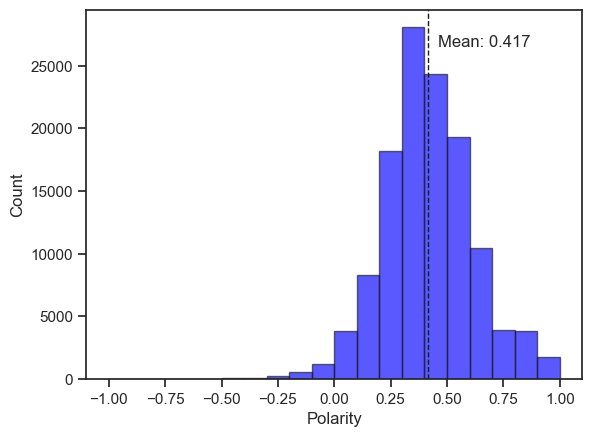

In [23]:
Histogram_21 = plt.hist(df_2021["polarity"], bins=20, color='blue', edgecolor='k', alpha=0.65)
plt.axvline(df_2021["polarity"].mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(df_2021["polarity"].mean()*1.1, max_ylim*0.9, 'Mean: {:.3f}'.format(df_2021["polarity"].mean()))

plt.xlabel("Polarity")
plt.ylabel("Count")
plt.title = ('Polarity Scores 2021') 

In [24]:
## Add Subjectivity scores to df_2021  

sub = lambda x: TextBlob(x).sentiment.subjectivity
df_2021['subjectivity'] = df_2021['comments'].apply(sub)
df_2021.head(3)

,listing_id,id,date,reviewer_id,comments,SentenceLength,Year,detect,comments_token,comments_string,comments_string_lem,polarity,subjectivity
0,13913,500561141545521489,2021-11-21,366903575,exactly what i needed! hostels do not do it fo...,249,2021,en,"['exactly', 'needed', 'hostels', 'hotels', 'bo...",exactly needed hostels hotels bore glad chose ...,exactly needed hostels hotels bore glad chose ...,0.379167,0.483333
1,17402,394726713362814033,2021-06-28,397231669,great place great location clean and modern pe...,79,2021,en,"['great', 'place', 'great', 'location', 'clean...",great place great location clean modern perfec...,great place great location clean modern perfec...,0.394444,0.750000
2,17402,515007156068464320,2021-12-11,54823672,great flat in good location very comfortable,46,2021,en,"['great', 'flat', 'good', 'location', 'comfort...",great flat good location comfortable,great flat good location comfortable,0.498750,0.618750


/Users/lucywalker/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

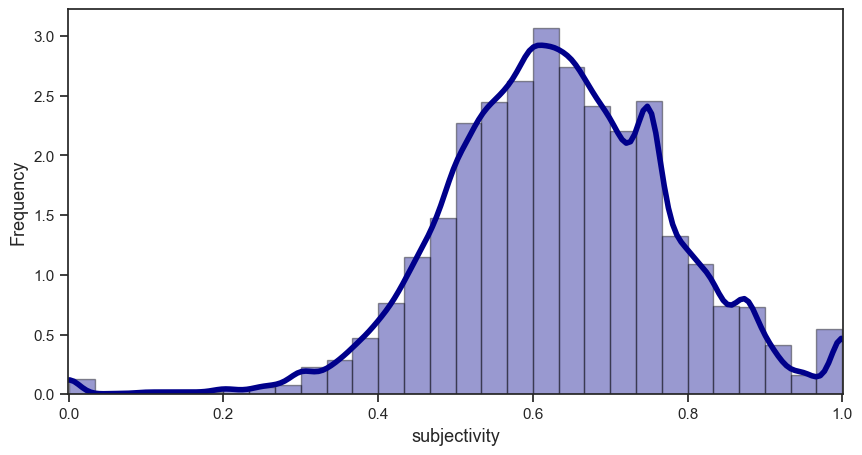

In [25]:
# Subjectivity Histogram

plt.figure(figsize=(10,5))
sns.distplot(df_2021['subjectivity'], hist=True, kde=True,
bins=int(30), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)


In [26]:
df_2021["subjectivity"].mean()

0.6327435284074325

In [27]:
# Forming N Grams function

import re
from nltk.util import ngrams
from collections import Counter
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

In [28]:
# Plotting N Grams function

def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()
    
plotNgrams

<function __main__.plotNgrams(documents)>

In [29]:
def textTrends(documents):
    plotNgrams(documents)


In [30]:
# Determining Sentiment

posReviews_2021 = df_2021[df_2021['polarity'] > 0]
negReviews_2021 = df_2021[df_2021['polarity'] < 0]

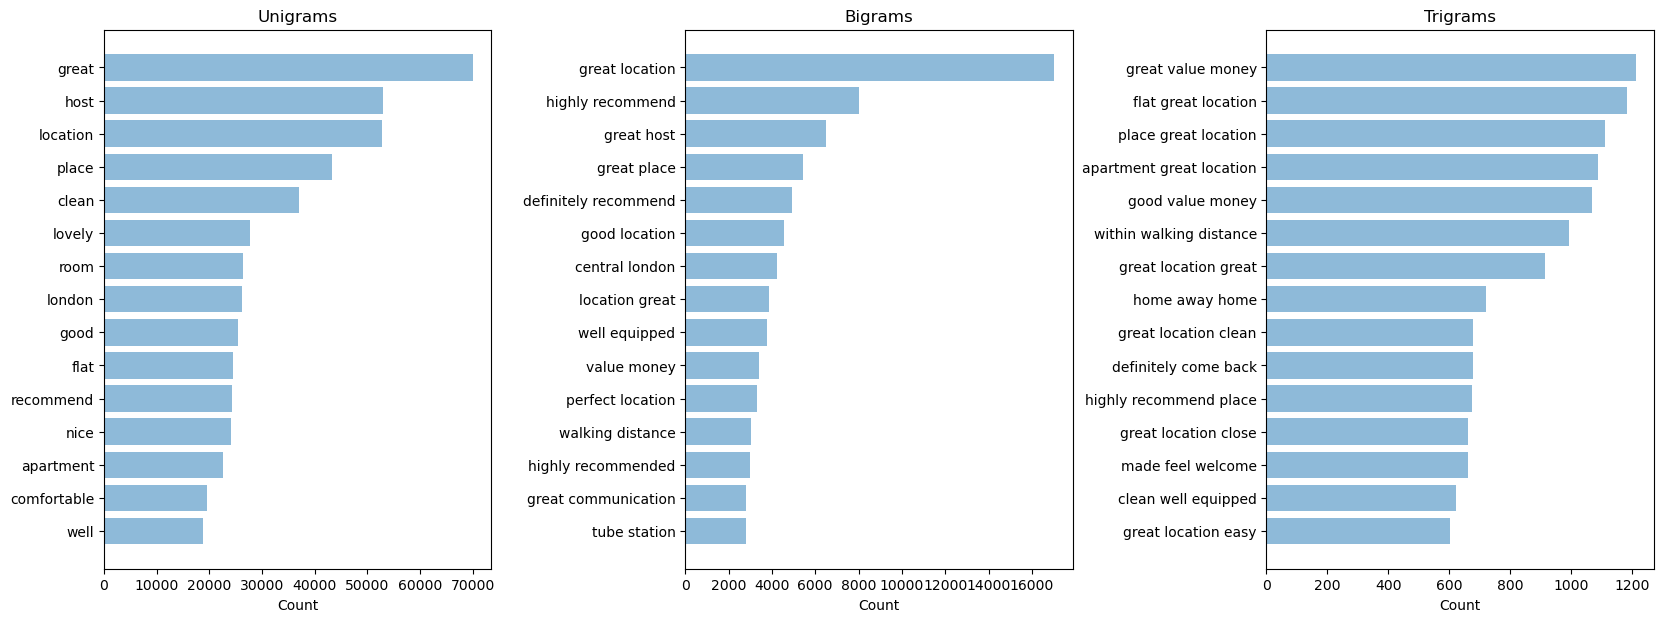

In [31]:
# Bigrams of positive reviews

textTrends(posReviews_2021['comments_string_lem'])

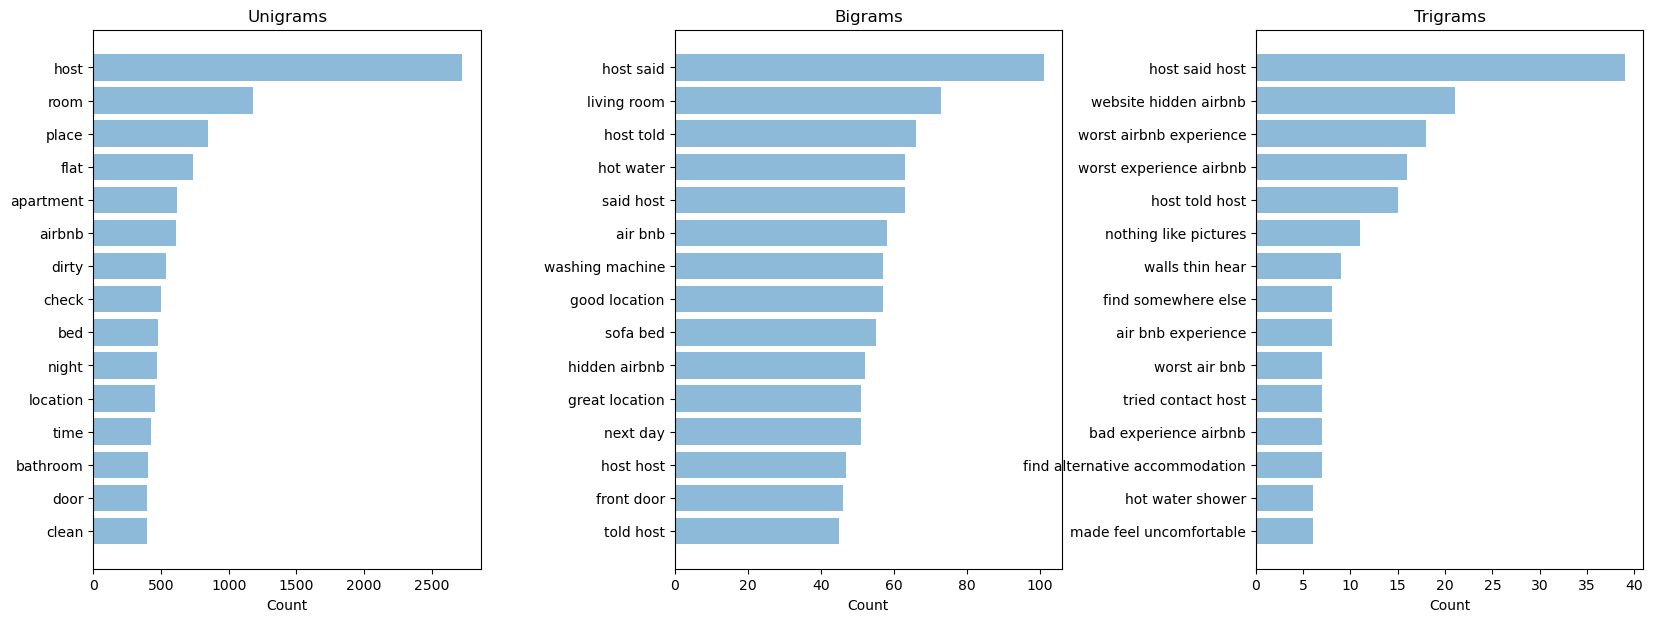

In [32]:
textTrends(negReviews_2021['comments_string_lem'])